In [ ]:
#LOCATION 1 - Wester Coates

In [14]:
import pandas as pd
data = pd.read_csv("07-17.01.29-02.04.csv")
print(data)

     Unnamed: 0   Unnamed: 1          Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                 NaN        NaN   
1           NaN     SITE NO:  07 - Wester Coates        NaN   
2           NaN        Date:            29/01/17        NaN   
3           NaN   Direction:                            NaN   
4           NaN          NaN                 NaN        NaN   
5           NaN         Hour                 P/C    P/C Kph   
6           NaN  00.00-00.59                   0          0   
7           NaN  01.00-01.59                   0          0   
8           NaN  02.00-02.59                   0          0   
9           NaN  03.00-03.59                   0          0   
10          NaN  04.00-04.59                   0          0   
11          NaN  05.00-05.59                   1         11   
12          NaN  06.00-06.59                   0          0   
13          NaN  07.00-07.59                   5         12   
14          NaN  08.00-08.59                   8       

In [15]:
data = data.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Wester Coates - DAILY FLOW BY HOUR')
data.drop(data.index[[0,1,2,3,4,5]], inplace=True)
data.drop(data.columns[[0,5]], axis=1, inplace=True)
data.index = data.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
data.rename(columns=newcols, inplace=True)
data

Wester Coates - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,0
1,01.00-01.59,0,0,0
2,02.00-02.59,0,0,0
3,03.00-03.59,0,0,0
4,04.00-04.59,0,0,0
5,05.00-05.59,1,11,1
6,06.00-06.59,0,0,0
7,07.00-07.59,5,12,2
8,08.00-08.59,8,15,7
9,09.00-09.59,15,16,15


In [16]:
data['Hourstarts'] = data.Hour.str.split('-').str.get(0)
data['Hourends'] = data.Hour.str.split('-').str.get(1)
#I have divided 'Hour' into two columns
#not sure why that's necessary but i tried to run as it is on seaborne and it didn't work
#gave me - ValueError: Unable to parse string "00.00-00.59"

In [17]:
data.drop(data.columns[0], axis=1, inplace=True)

In [51]:
data.to_csv('Location1.csv')
#I did this so I can link cleaned data to another notebook for analysis

In [5]:
data.tail()
#things to tidy up -  Nan,'Total' rows and rows with unneccessary string e.g. 'P/C'
#I also want to divide dataframe into smaller set for each day

,Bike Counts,Bike Speed,Pedestrian Counts,Hourstarts,Hourends
203,2,18,3,20.00,20.59
204,0,0,2,21.00,21.59
205,1,14,1,22.00,22.59
206,1,14,0,23.00,23.59
207,262,NaN,213,Total,NaN


In [18]:
data = data.dropna(how='all')
data

,Bike Counts,Bike Speed,Pedestrian Counts,Hourstarts,Hourends
0,0,0,0,00.00,00.59
1,0,0,0,01.00,01.59
2,0,0,0,02.00,02.59
3,0,0,0,03.00,03.59
4,0,0,0,04.00,04.59
5,1,11,1,05.00,05.59
6,0,0,0,06.00,06.59
7,5,12,2,07.00,07.59
8,8,15,7,08.00,08.59
9,15,16,15,09.00,09.59


In [19]:
data = data[data.Hourstarts != "Direction:"]
data

,Bike Counts,Bike Speed,Pedestrian Counts,Hourstarts,Hourends
0,0,0,0,00.00,00.59
1,0,0,0,01.00,01.59
2,0,0,0,02.00,02.59
3,0,0,0,03.00,03.59
4,0,0,0,04.00,04.59
5,1,11,1,05.00,05.59
6,0,0,0,06.00,06.59
7,5,12,2,07.00,07.59
8,8,15,7,08.00,08.59
9,15,16,15,09.00,09.59


In [20]:
data = data[data.Hourstarts != "Total"]
data

,Bike Counts,Bike Speed,Pedestrian Counts,Hourstarts,Hourends
0,0,0,0,00.00,00.59
1,0,0,0,01.00,01.59
2,0,0,0,02.00,02.59
3,0,0,0,03.00,03.59
4,0,0,0,04.00,04.59
5,1,11,1,05.00,05.59
6,0,0,0,06.00,06.59
7,5,12,2,07.00,07.59
8,8,15,7,08.00,08.59
9,15,16,15,09.00,09.59


In [21]:
data = data[data.Hourstarts != "Hour"]
data

,Bike Counts,Bike Speed,Pedestrian Counts,Hourstarts,Hourends
0,0,0,0,00.00,00.59
1,0,0,0,01.00,01.59
2,0,0,0,02.00,02.59
3,0,0,0,03.00,03.59
4,0,0,0,04.00,04.59
5,1,11,1,05.00,05.59
6,0,0,0,06.00,06.59
7,5,12,2,07.00,07.59
8,8,15,7,08.00,08.59
9,15,16,15,09.00,09.59


In [22]:
data = data[data.Hourstarts != "Date:"]
data

,Bike Counts,Bike Speed,Pedestrian Counts,Hourstarts,Hourends
0,0,0,0,00.00,00.59
1,0,0,0,01.00,01.59
2,0,0,0,02.00,02.59
3,0,0,0,03.00,03.59
4,0,0,0,04.00,04.59
5,1,11,1,05.00,05.59
6,0,0,0,06.00,06.59
7,5,12,2,07.00,07.59
8,8,15,7,08.00,08.59
9,15,16,15,09.00,09.59


In [23]:
pd.options.mode.chained_assignment = None

In [24]:
data[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = data[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [25]:
data.reset_index(inplace=True)

In [26]:
data1 = data.iloc[0:24]
data2 = data.iloc[24:48]
data3 = data.iloc[48:72]
data4 = data.iloc[72:96]
data5 = data.iloc[96:120]
data6 = data.iloc[120:144]
data7 = data.iloc[144:168]
#my data is divided into 7 clean sets

In [ ]:
#Note - at this point I was thinking of doing a new column with 'Day' but I couldn't figure out how to divide
#all row values into weekdays - e.g. "how many times x occured on Saturday" without making a mess so I left it for now
#I only managed to figure out how to make an empty column using data['Day'] = np.empty((len(data), 0)).tolist() 

In [ ]:
#STATISTICS and GRAPHS SECTION

In [ ]:
#Wester Coates - 30/01/2017 - 04/02/2017
#I am going to look at stats together with graphs to analyse data
#I am going to compare weekdays and weekends
#and also compare with another, more central, location e.g. Meadows 
#in another notebook to keep things simple
#I decided to keep my data sample small

In [ ]:
#day of the week with highest/ lowest bike traffic?

In [ ]:
#data1 = Sunday
#data2 = Monday
#data3 = Tuesday
#data4 = Wednesday
#data5 = Thursday
#data6 = Friday
#data7 = Saturday

In [319]:
data1['Bike Counts'].sum()
#data 1 = 391
#data 2 = 628
#data 3 = 682
#data 4 = 782
#data 5 = 703
#data 6 = 615
#data 7 = 262
#lowest bike traffic = Saturday. Highest bike traffic = Wednesday. 
#Conclusion - week days have higher bike traffic than week ends.

391

In [43]:
data1['Bike Speed'].sum()
#data 1 = 254
#data 2 = 335
#data 3 = 340
#data 4 = 333
#data 5 = 363
#data 6 = 311
#data 7 = 256
#lowest bike speed = Sunday. Highest bike traffic = Thursday. 
#Conclusion - week days have higher bike speed than week ends.

254

In [27]:
#GRAPHS
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

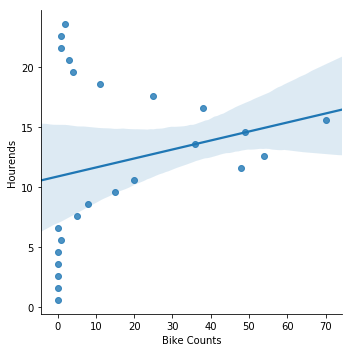

In [28]:
sns.lmplot(x='Bike Counts',y='Hourends',data=data1)
#this graph shows that there are few bikes at the beggining and end of the day e.g. 0-9 am and 7 pm - 12 pm
#the largest concentration occurs during day time
#29/01/2017 - is a Sunday - so in all likelihood people are not in the 9-5 rush

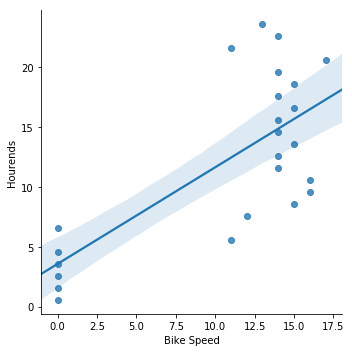

In [29]:
sns.lmplot(x='Bike Speed',y='Hourends',data=data1)
#speed is at '0' at 0 to 5 hours which obviously means there's no bikers around that time
#There's one biker at between 5 and 6 am going at 11 which as we've seen is at the lower ends of speed average
#on average, the speed average is between 13-15 and concentrated between daylight - 9 am - 4 pm
#I considered the fact that this data was obtained at the end of January when it gets dark quickly in the afternoon
#(around 16:30 according to https://www.timeanddate.com/sun/uk/edinburgh?month=1&year=2017) 
#when it's dark people are less likely to be biking around fast for obvious safety reasons
#would be interesting to compare with summer

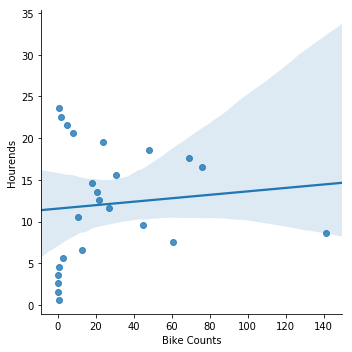

In [35]:
sns.lmplot(x='Bike Counts',y='Hourends',data=data2)
#I am not quite sure why 'Hourends' is going up to 35 as that's not showing up when i run data2
#despite this odd feature, the graph shows that bike counts are particularly high at 8 am
#with 140 counts. As it's Monday, many people are presumably going to work.
#very few bike counts very early in the morning and late at night/evening. 
#Would be interesting to know the direction of bikers? 
#while it's hard to make assumptions based on geographical location/ direction with this little data
#Wester Coates is a road that is fairly well connected to city centre
#Moreover, the area around Wester Coates is fairly residential so perhaps morning bikers are more likely
#to be going to city centre whereas evening bikers are coming back from city centre
#there also seem to be more bikers leaving in the morning - perhaps they are using a different route on the way back?
#either way, it is all speculation at this point

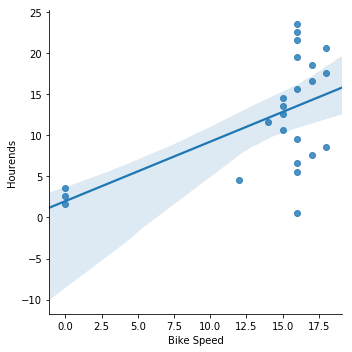

In [30]:
sns.lmplot(x='Bike Speed',y='Hourends',data=data2)
#It seems the Monday rush is very real. Interestingly, the level of bike speed is consistently high 
#from morning until evening so no time for casual biking except between 0 - 5
#presumably, in the dark so not a good idea to speed bike 

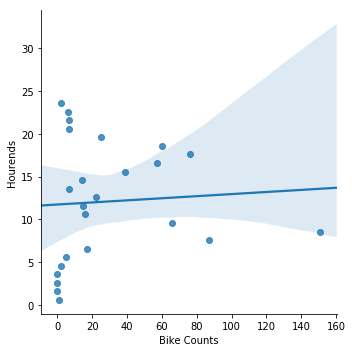

In [38]:
sns.lmplot(x='Bike Counts',y='Hourends',data=data3)
#Tuesday is similar pattern to data2 (Monday) - consistent weekday pattern

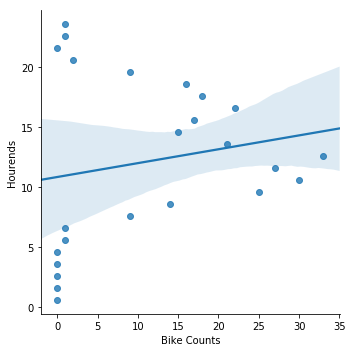

In [40]:
sns.lmplot(x='Bike Counts',y='Hourends',data=data7)
#Saturday - not as evenly distributed as Sunday but certainly more similar to week end pattern than week day

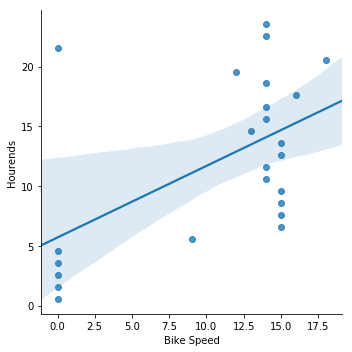

In [42]:
sns.lmplot(x='Bike Speed',y='Hourends',data=data7)
#again, this confirms hypothesis that speed is more relaxed on week ends than week days, even if by a small margin

In [ ]:
#~THE END~ (not really, there's another notebook of more of the same) 